In [5]:
import heapq

# 1. Define the Part Graph (Nodes and Edges)
# key: Part ID, value: List of (Neighbor Part ID, Edge Cost)
PART_GRAPH = {
    'Original_Tire': [('Upgrade_Tire_A', 5), ('Upgrade_Tire_B', 15)],
    'Upgrade_Tire_A': [('Performance_Tire', 8)],
    'Upgrade_Tire_B': [('Performance_Tire', 2)],
    'Performance_Tire': [], # A potential final/goal part
    # ... other parts like seats, lights, etc.
}

# 2. Define the Heuristic Scores h(n)
# Pre-calculated based on price, compatibility, rating, and popularity.
# Lower h(n) means the part is estimated to be "better."
HEURISTIC_SCORES = {
    'Original_Tire': 50,
    'Upgrade_Tire_A': 30,
    'Upgrade_Tire_B': 10,  # Lower score = better part recommendation
    'Performance_Tire': 5, # Best score, closest to goal
}

def a_star_search(start_node, graph, heuristics):
    # The A* Priority Queue (Open List)
    # Stores tuples: (f_score, part_id, path_so_far)
    # f_score = g_score + h_score
    # heapq will always retrieve the element with the lowest f_score.
    open_list = []

    # 1. Initialize the start node
    g_score = 0  # Cost from start to itself is 0
    h_score = heuristics.get(start_node, float('inf'))
    f_score = g_score + h_score

    # Push initial state onto the heap
    heapq.heappush(open_list, (f_score, start_node, [start_node]))

    # Track the lowest g_score found for each node
    g_scores = {start_node: 0}

    # Track the best (lowest f_score) part found so far
    best_part = None
    min_f_score = float('inf')

    # The A* Search Loop
    while open_list:
        # Get the node with the lowest f_score (Best-First)
        current_f, current_part, current_path = heapq.heappop(open_list)

        # Update the overall best part found
        if current_f < min_f_score:
            min_f_score = current_f
            best_part = current_part

        # Check neighbors
        for neighbor_part, edge_cost in graph.get(current_part, []):

            # g(n): The actual cost of the path to the neighbor
            new_g_score = g_scores.get(current_part, float('inf')) + edge_cost

            # Check if this is a better path to the neighbor
            if new_g_score < g_scores.get(neighbor_part, float('inf')):

                # Update g_score
                g_scores[neighbor_part] = new_g_score

                # h(n): The heuristic cost (estimated cost to the goal)
                h_score = heuristics.get(neighbor_part, float('inf'))

                # f(n) = g(n) + h(n)
                f_score = new_g_score + h_score

                # Create the new path
                new_path = current_path + [neighbor_part]

                # Push the neighbor to the open list
                heapq.heappush(open_list, (f_score, neighbor_part, new_path))

    return best_part, min_f_score

    # Assuming the customer has 'Original_Tire' and we want the best path
start_node = 'Original_Tire'

best_recommendation, final_score = a_star_search(start_node, PART_GRAPH, HEURISTIC_SCORES)

print(f"Start Part: {start_node}")
print(f"Best Recommended Part (lowest f(n)): {best_recommendation}")
print(f"Final A* Score (f(n)): {final_score}")

# Note: The simple return only gives the best *part* based on the lowest f-score
# achieved through the search, rather than the entire path to it.
# You would need to add logic to trace the path back if you wanted the full upgrade sequence.


Start Part: Original_Tire
Best Recommended Part (lowest f(n)): Performance_Tire
Final A* Score (f(n)): 18


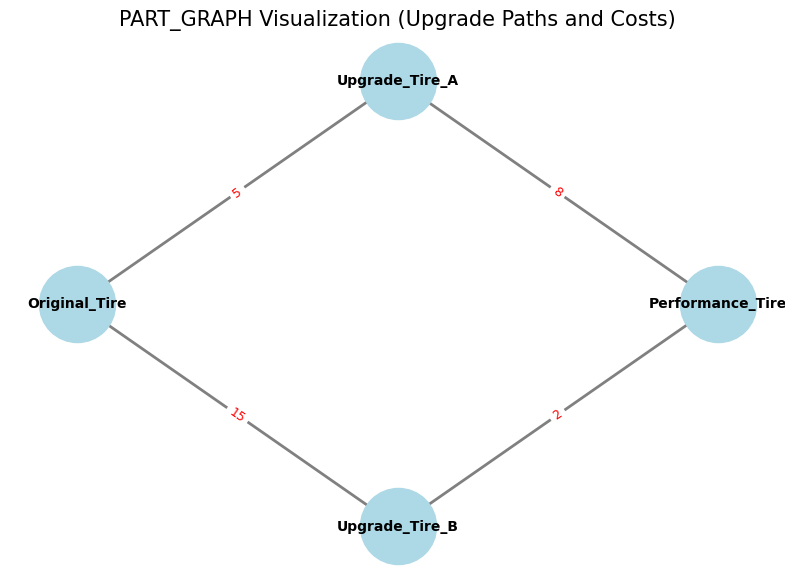

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for part in PART_GRAPH.keys():
    G.add_node(part)

# Add edges with weights (costs)
for source_part, destinations in PART_GRAPH.items():
    for dest_part, cost in destinations:
        G.add_edge(source_part, dest_part, weight=cost)

# Define node positions for better visualization (optional, but helps)
# This is a manual layout for clarity, for larger graphs, you might use algorithms like spring_layout
pos = {
    'Original_Tire': (0, 0),
    'Upgrade_Tire_A': (1, 1),
    'Upgrade_Tire_B': (1, -1),
    'Performance_Tire': (2, 0)
}

plt.figure(figsize=(10, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=20, width=2)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edge labels (costs)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)

plt.title('PART_GRAPH Visualization (Upgrade Paths and Costs)', size=15)
plt.axis('off') # Hide axes
plt.show()